In [1]:
from pathlib import Path

import flopy as fp
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and explore example

In [2]:
workspace = Path("C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\examples\\ex-gwf-advtidal")
sim_name = "ex-gwf-advtidal"
sim = fp.mf6.MFSimulation.load(
    sim_name=sim_name,
    version="mf6",
    exe_name="C:\\Users\\buckl\\Documents\\Software\\mf6.4.1\\bin\\mf6.exe",
    sim_ws=workspace
)
sim

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package ic...
    loading package sto...
    loading package ghb...
    loading package wel...
    loading package riv...
    loading package rch...
    loading package rch...
    loading package rch...
    loading package evt...
    loading package oc...
    loading package obs...
  loading solution package ex-gwf-advtidal...


sim_name = ex-gwf-advtidal
sim_path = C:\Users\buckl\Documents\Software\mf6.4.1\examples\ex-gwf-advtidal
exe_name = C:\Users\buckl\Documents\Software\mf6.4.1\bin\mf6.exe

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = ex-gwf-advtidal


###################
Package ex-gwf-advtidal.tdis
###################

package_name = ex-gwf-advtidal.tdis
filename = ex-gwf-advtidal.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-advtidal


###################
Package ex-gwf-advtidal
###################

package_name = ex-gwf-advtidal
filename = ex-gwf-advtidal.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = ex-gwf-advtidal


@@@@@@@@@@@@@@@@@@@@
Model ex-gwf-advtidal
@@@@@@@@@@@@@@@@@@@@

name = ex-gwf-advtidal
model_type = gwf6
version = mf6
model_relative_path = 

###################
Packag

In [3]:
sim.model_names

['ex-gwf-advtidal']

In [4]:
model = sim.get_model(model_name='ex-gwf-advtidal')
model

name = ex-gwf-advtidal
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = ex-gwf-advtidal.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-advtidal


###################
Package npf
###################

package_name = npf
filename = ex-gwf-advtidal.npf
package_type = npf
model_or_simulation_package = model
model_name = ex-gwf-advtidal


###################
Package ic
###################

package_name = ic
filename = ex-gwf-advtidal.ic
package_type = ic
model_or_simulation_package = model
model_name = ex-gwf-advtidal


###################
Package sto
###################

package_name = sto
filename = ex-gwf-advtidal.sto
package_type = sto
model_or_simulation_package = model
model_name = ex-gwf-advtidal


###################
Package ghb_ts
###################

package_name = ghb_ts
filename = ex-gwf-advtidal.ghb.ts
package_type = ts
model_or_simulation_package = model
mod

In [5]:
# what is the temporal discretization?
sim.package_type_dict['tdis']

[package_name = ex-gwf-advtidal.tdis
 filename = ex-gwf-advtidal.tdis
 package_type = tdis
 model_or_simulation_package = simulation
 simulation_name = ex-gwf-advtidal
 
 Block options
 --------------------
 time_units
 {internal}
 ('days')
 
 
 Block dimensions
 --------------------
 nper
 {internal}
 (4)
 
 
 Block perioddata
 --------------------
 perioddata
 {internal}
 (rec.array([( 1.,   1, 1.), (10., 120, 1.), (10., 120, 1.), (10., 120, 1.)],
           dtype=[('perlen', '<f8'), ('nstp', '<i4'), ('tsmult', '<f8')]))
 
 ]

First stress period is steady-state; second, third, and fourth stress periods are transient

In [6]:
# what is the spatial discretization?
model.get_package('dis')

package_name = dis
filename = ex-gwf-advtidal.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
length_units
{internal}
('meters')


Block dimensions
--------------------
nlay
{internal}
(3)

nrow
{internal}
(15)

ncol
{internal}
(10)


Block griddata
--------------------
delr
{constant 500.0}

delc
{constant 500.0}

top
{constant 50.0}

botm
Layer_1{constant 5.0}
Layer_2{constant -10.0}
Layer_3{constant -100.0}



First layer is an unconfined aquifer that is 45 m thick.

Second layer is a 15 m thick confining unit.

Third layer is a 90 m thick confined aquifer.

In [7]:
# what packages does the model have?
model.package_names

['dis',
 'npf',
 'ic',
 'sto',
 'ghb_ts',
 'ghb_obs',
 'ghb-tidal',
 'wel_ts',
 'wel',
 'riv_ts',
 'riv',
 'rch_ts',
 'rch-zone_1',
 'rch_1_ts',
 'rch-zone_2',
 'rch_2_ts',
 'rch-zone_3',
 'evt',
 'oc',
 'obs_1']

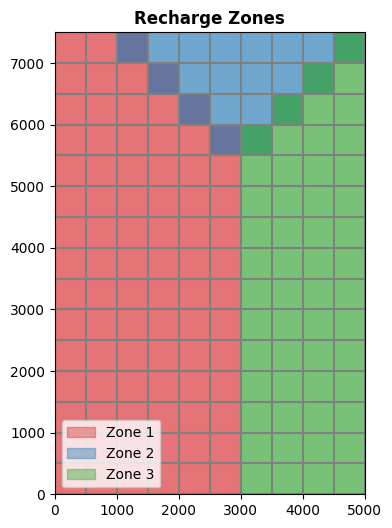

In [8]:
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_title('Recharge Zones', fontweight='bold')
mapview = fp.plot.PlotMapView(model=model, ax=ax)
mapview.plot_ibound()
mapview.plot_grid()

mapview.plot_bc(package=model.get_package('rch-zone_1'), color='tab:red', alpha=0.4)
mapview.plot_bc(package=model.get_package('rch-zone_2'), color='tab:blue', alpha=0.4)
mapview.plot_bc(package=model.get_package('rch-zone_3'), color='tab:green', alpha=0.4)
ax.legend(handles=[
    Patch(color='tab:red', alpha=0.4, label='Zone 1'),
    Patch(color='tab:blue', alpha=0.4, label='Zone 2'),
    Patch(color='tab:green', alpha=0.4, label='Zone 3')
], loc='lower left')

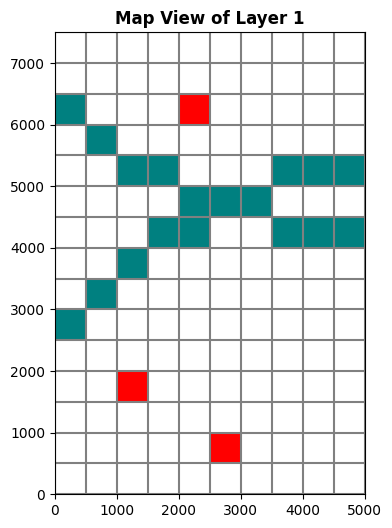

In [9]:
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_title('Map View of Layer 1', fontweight='bold')
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=0)
mapview.plot_ibound()
mapview.plot_grid()

mapview.plot_bc('WEL', kper=3)
mapview.plot_bc('RIV')

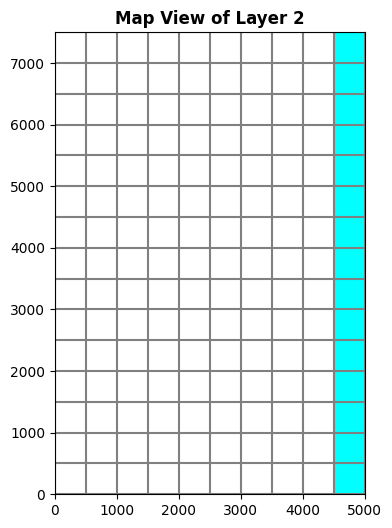

In [10]:
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_title('Map View of Layer 2', fontweight='bold')
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=1)
mapview.plot_ibound()
mapview.plot_grid()

mapview.plot_bc('GHB')

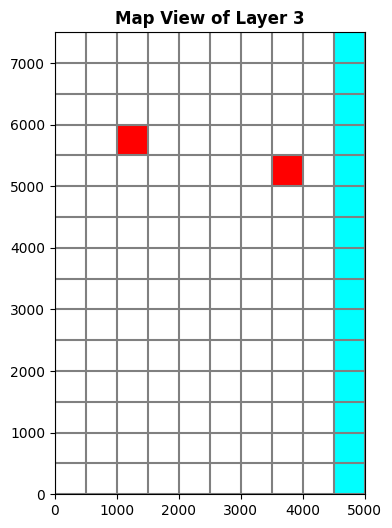

In [11]:
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_title('Map View of Layer 3', fontweight='bold')
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=2)
mapview.plot_ibound()
mapview.plot_grid()

mapview.plot_bc('GHB')
mapview.plot_bc('WEL', kper=3)

# 2. Check and run simulation

In [12]:
sim.check()

Checking model "ex-gwf-advtidal"...

ex-gwf-advtidal MODEL DATA VALIDATION SUMMARY:
  No errors or warnings encountered.

  Checks that passed:
    npf package: zero or negative horizontal hydraulic conductivity values
    npf package: vertical hydraulic conductivity values below checker threshold of 1e-11
    npf package: vertical hydraulic conductivity values above checker threshold of 100000.0
    npf package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    npf package: horizontal hydraulic conductivity values above checker threshold of 100000.0
    sto package: zero or negative specific storage values
    sto package: specific storage values below checker threshold of 1e-06
    sto package: specific storage values above checker threshold of 0.01
    sto package: zero or negative specific yield values
    sto package: specific yield values below checker threshold of 0.01
    sto package: specific yield values above checker threshold of 0.5
    ghb-tidal

In [13]:
success, buff = sim.run_simulation()
assert success, "MODFLOW did not terminate normally!"

FloPy is using the following executable to run the model: ..\..\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                        VERSION 6.4.1 Release 12/09/2022

   MODFLOW 6 compiled Dec 09 2022 18:18:37 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government s

# 3. Plot results

In [14]:
hds = fp.utils.binaryfile.HeadFile(Path(workspace, "ex-gwf-advtidal.hds"))
times = hds.get_times()
len(times)

361

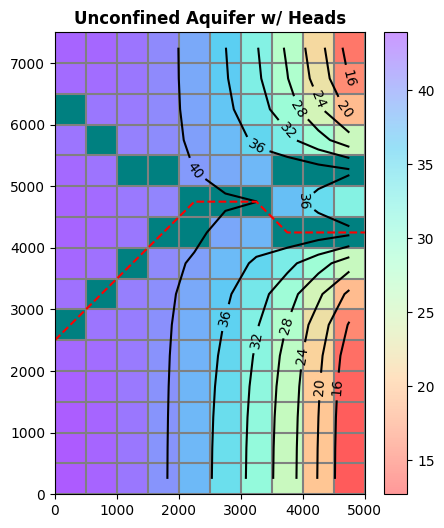

In [52]:
fig, ax = plt.subplots(figsize=(5, 6))
ax.set_title('Unconfined Aquifer w/ Heads', fontweight='bold')
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=0)
mapview.plot_ibound()
mapview.plot_grid()

hds_steady = hds.get_data(totim=times[0])
hds_fill = mapview.plot_array(hds_steady, cmap='rainbow_r', alpha=0.4)
plt.colorbar(hds_fill)
hds_cntr = mapview.contour_array(hds_steady, colors='black')
plt.clabel(hds_cntr, fmt='%.0f')

mapview.plot_bc('RIV')
ax.plot(
    [0, 2250, 3250, 3750, 5000],
    [2500, 4750, 4750, 4250, 4250],
    'r--'
)

<a list of 5 text.Text objects>

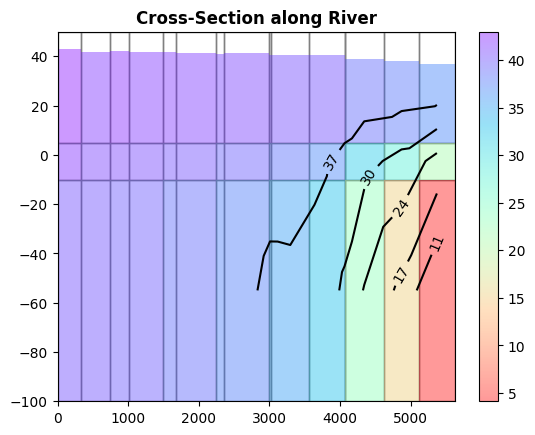

In [57]:
fig, ax = plt.subplots()
ax.set_title("Cross-Section along River", fontweight='bold')
xsect = fp.plot.PlotCrossSection(model=model, line={'line': [
    (0, 2250),
    (2250, 4750),
    (3250, 4750),
    (3750, 4250),
    (5000, 4250)
]})
xsect.plot_ibound()
xsect.plot_grid()

hds_fill = xsect.plot_array(hds_steady, head=hds_steady, cmap='rainbow_r', alpha=0.4)
plt.colorbar(hds_fill)
hds_cnt = xsect.contour_array(hds_steady, head=hds_steady, colors="black")
plt.clabel(hds_cnt, fmt='%.0f')

<a list of 8 text.Text objects>

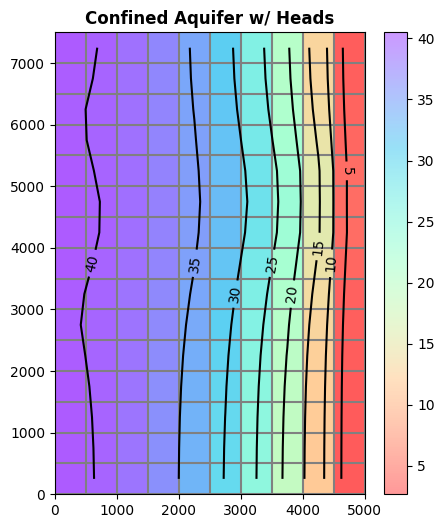

In [46]:
fig, ax = plt.subplots(figsize=(5, 6))
ax.set_title('Confined Aquifer w/ Heads', fontweight='bold')
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=2)
mapview.plot_ibound()
mapview.plot_grid()

hds_fill = mapview.plot_array(hds_steady, cmap='rainbow_r', alpha=0.4)
plt.colorbar(hds_fill)
hds_cntr = mapview.contour_array(hds_steady, colors='black')
plt.clabel(hds_cntr, fmt='%.0f')

<a list of 11 text.Text objects>

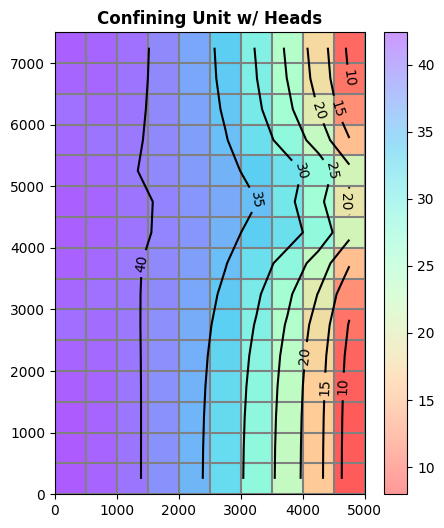

In [47]:
fig, ax = plt.subplots(figsize=(5, 6))
ax.set_title('Confining Unit w/ Heads', fontweight='bold')
mapview = fp.plot.PlotMapView(model=model, ax=ax, layer=1)
mapview.plot_ibound()
mapview.plot_grid()

hds_fill = mapview.plot_array(hds_steady, cmap='rainbow_r', alpha=0.4)
plt.colorbar(hds_fill)
hds_cntr = mapview.contour_array(hds_steady, colors='black')
plt.clabel(hds_cntr, fmt='%.0f')

# 4. Breakdown simulation level packages

In [58]:
sim.package_type_dict.keys()

dict_keys(['nam', 'tdis', 'ims'])

## 4(a). [Temporal Discretization (TDIS) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mftdis.html)

In [59]:
sim.get_package('tdis')

package_name = ex-gwf-advtidal.tdis
filename = ex-gwf-advtidal.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = ex-gwf-advtidal

Block options
--------------------
time_units
{internal}
('days')


Block dimensions
--------------------
nper
{internal}
(4)


Block perioddata
--------------------
perioddata
{internal}
(rec.array([( 1.,   1, 1.), (10., 120, 1.), (10., 120, 1.), (10., 120, 1.)],
          dtype=[('perlen', '<f8'), ('nstp', '<i4'), ('tsmult', '<f8')]))



#### Reverse-engineer class summary!

First stress period is steady-state, the rest are transient.

```python
time_units = "days"
nper = 4
# list of (perlen, nstp, tsmult)
perioddata = [
    # first stress period: steady state
    # 1 day, 1 time step
    (1.0, 1, 1.0),
    # second stress period: transient
    # 10 days, 120 time steps
    (10.0, 120, 1.0),
    # third stress period: transient
    (10.0, 120, 1.0),
    # fourth stress period: transient
    (10.0, 120, 1.0)
]
filename = "ex-gwf-advtidal.tdis"
pname = "ex-gwf-advtidal.tdis"
```

## 4(b). [Iterative Model Solution (IMS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfims.html)

In [60]:
sim.get_package('ims')

package_name = ex-gwf-advtidal
filename = ex-gwf-advtidal.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = ex-gwf-advtidal

Block nonlinear
--------------------
outer_dvclose
{internal}
(1e-09)

outer_maximum
{internal}
(50)


Block linear
--------------------
inner_maximum
{internal}
(100)

inner_dvclose
{internal}
(1e-09)

rcloserecord
{internal}
(rec.array([('inner_rclose', 1.e-06, 'strict')],
          dtype=[('inner_rclose_label', 'O'), ('inner_rclose', '<f8'), ('rclose_option', 'O')]))



#### Reverse-engineer class summary!

```python
outer_dvclose = 1e-9
outer_maximum = 50
inner_maximum = 100
inner_dvclose = 1e-9
rcloserecord = [1e-6, "strict"]
filename = "ex-gwf-advtidal.ims"
pname = "ex-gwf-advtidal"
```

# 5. Breakdown model level packages

In [61]:
model.package_names

['dis',
 'npf',
 'ic',
 'sto',
 'ghb_ts',
 'ghb_obs',
 'ghb-tidal',
 'wel_ts',
 'wel',
 'riv_ts',
 'riv',
 'rch_ts',
 'rch-zone_1',
 'rch_1_ts',
 'rch-zone_2',
 'rch_2_ts',
 'rch-zone_3',
 'evt',
 'oc',
 'obs_1']

## 5(a). [Structured Discretization (DIS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfdis.html)

In [78]:
model.package_dict['dis']

package_name = dis
filename = ex-gwf-advtidal.dis
package_type = dis
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
length_units
{internal}
('meters')


Block dimensions
--------------------
nlay
{internal}
(3)

nrow
{internal}
(15)

ncol
{internal}
(10)


Block griddata
--------------------
delr
{constant 500.0}

delc
{constant 500.0}

top
{constant 50.0}

botm
Layer_1{constant 5.0}
Layer_2{constant -10.0}
Layer_3{constant -100.0}



#### Reverse-engineer class summary!

```python
length_units = "meters"
nlay = 3
nrow = 15
ncol = 10
delr = 500.0
delc = 500.0
top = 50.0
botm = [
    # bottom of unconfined aquifer
    5.0,
    # bottom of confining unit
    -10.0,
    # bottom of confined aquifer
    -100.0
]
filename = "ex-gwf-advtidal.dis"
pname = "dis"
```

## 5(b). [Node Property Flow (NPF) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfnpf.html)

In [79]:
model.package_dict['npf']

package_name = npf
filename = ex-gwf-advtidal.npf
package_type = npf
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
cvoptions
{internal}
([(True, 'DEWATERED')])

perched
{internal}
(True)

save_specific_discharge
{internal}
(True)


Block griddata
--------------------
icelltype
Layer_1{constant 1}
Layer_2{constant 0}
Layer_3{constant 0}

k
Layer_1{constant 5.0}
Layer_2{constant 0.1}
Layer_3{constant 4.0}

k33
Layer_1{constant 0.5}
Layer_2{constant 0.005}
Layer_3{constant 0.1}



#### Reverse-engineer class summary!

```python
cvoptions = [(True, "DEWATERED")]
perched = True
save_specific_discharge = True
icelltype = [
    # unconfined aquifer is unconfined/convertible
    1,
    # confining unit is confined
    0,
    # confined aquifer is confined
    0
]
# (horizontal) hydraulic conductivity
k = [
    # unconfined aquifer
    5.0,
    # confining unit
    0.1,
    # confined aqufier
    4.0
]
# (vertical) hydraulic conductivity
k33 = [
    # unconfined aquifer
    0.5,
    # confining unit
    0.005,
    # confined aquifer
    0.1
]
filename = "ex-gwf-advtidal.npf"
pname = "npf"
```

## 5(c). [Initial Conditions (IC) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfic.html)

In [80]:
model.package_dict['ic']

package_name = ic
filename = ex-gwf-advtidal.ic
package_type = ic
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block griddata
--------------------
strt
{constant 50.0}



#### Reverse-engineer class summary!

```python
# starting head
strt = 50.0
filename = "ex-gwf-advtidal.ic"
pname = "ic"
```

## 5(d). [Storage (STO) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfsto.html)

In [65]:
model.package_dict['sto'].__class__

flopy.mf6.modflow.mfgwfsto.ModflowGwfsto

In [81]:
model.package_dict['sto']

package_name = sto
filename = ex-gwf-advtidal.sto
package_type = sto
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block griddata
--------------------
iconvert
{constant 1}

ss
{constant 1e-06}

sy
{constant 0.2}


Block period
--------------------
steady-state
{internal}
(True)

transient
{internal}
(True)



#### Reverse-engineer class summary!

```python
# flag for each cell that specifies whether or not a cell is convertible for the storage calculation
# iconvert > 0: confined storage is used when head is above cell top and a mixed formulation of unconfined and confined storage is used when head is below cell top
iconvert = 1
# specific storage
ss = 1e-6
# specific yield
sy = 0.2
# indicates stress period IPER is steady-state
steady_state = True
# indicates stress period IPER is transient
transient = True
filename = "ex-gwf-advtidal.sto"
pname = "sto"
```

## 5(e). [General-Head Boundary (GHB) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfghb.html)

In [66]:
model.package_dict['ghb-tidal'].__class__

flopy.mf6.modflow.mfgwfghb.ModflowGwfghb

In [82]:
model.package_dict['ghb-tidal']

package_name = ghb-tidal
filename = ex-gwf-advtidal.ghb
package_type = ghb
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
boundnames
{internal}
(True)

ts_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.ghb.ts',)],
          dtype=[('ts6_filename', 'O')]))

obs_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.ghb.obs',)],
          dtype=[('obs6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(30)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830D6F7110>}


In [83]:
model.package_dict['ghb-tidal'].stress_period_data.get_data(key=0)

rec.array([((1, 0, 9), 'tides',   15., 'estuary-l2'),
           ((1, 1, 9), 'tides',   15., 'estuary-l2'),
           ((1, 2, 9), 'tides',   15., 'estuary-l2'),
           ((1, 3, 9), 'tides',   15., 'estuary-l2'),
           ((1, 4, 9), 'tides',   15., 'estuary-l2'),
           ((1, 5, 9), 'tides',   15., 'estuary-l2'),
           ((1, 6, 9), 'tides',   15., 'estuary-l2'),
           ((1, 7, 9), 'tides',   15., 'estuary-l2'),
           ((1, 8, 9), 'tides',   15., 'estuary-l2'),
           ((1, 9, 9), 'tides',   15., 'estuary-l2'),
           ((1, 10, 9), 'tides',   15., 'estuary-l2'),
           ((1, 11, 9), 'tides',   15., 'estuary-l2'),
           ((1, 12, 9), 'tides',   15., 'estuary-l2'),
           ((1, 13, 9), 'tides',   15., 'estuary-l2'),
           ((1, 14, 9), 'tides',   15., 'estuary-l2'),
           ((2, 0, 9), 'tides', 1500., 'estuary-l3'),
           ((2, 1, 9), 'tides', 1500., 'estuary-l3'),
           ((2, 2, 9), 'tides', 1500., 'estuary-l3'),
           ((2, 3, 9), 

#### Class summary for ghb-tidal

```python
# indicates boundary names may be provided with the list of general-head boundary cells
boundnames = True
# will create a ModflowUtlts package
timeseries = {
    "time_series_namerecord": ["tides"], # check this
    "interpolation_methodrecord": ["linear"] # check this
    # list of (ts_time, ts_array)
    # ts_time (double): time relative to the start of the simulation
    # ts_array (double): floating-point values
    "timeseries": [
        ( 0.   , -2.5), ( 0.05 , -2.1), ( 0.206,  2.1), ( 0.256,  2.5),
        ( 0.306,  2. ), ( 0.462, -2.4), ( 0.512, -2.8), ( 0.562, -2.4),
        ( 0.718,  2.4), ( 0.768,  2.8), ( 0.818,  2.4), ( 0.974, -2.1),
        ( 1.024, -2.5), ( 1.074, -2.1), ( 1.23 ,  2.1), ( 1.28 ,  2.5),
        ( 1.33 ,  2. ), ( 1.486, -2.4), ( 1.536, -2.8), ( 1.586, -2.4),
        ( 1.742,  2.4), ( 1.792,  2.8), ( 1.842,  2.4), ( 1.998, -2.1),
        ( 2.048, -2.5), ( 2.098, -2.1), ( 2.254,  2.1), ( 2.304,  2.5),
        ( 2.354,  2. ), ( 2.51 , -2.4), ( 2.56 , -2.8), ( 2.61 , -2.4),
        ( 2.766,  2.4), ( 2.816,  2.8), ( 2.866,  2.4), ( 3.022, -2.1),
        ( 3.072, -2.5), ( 3.122, -2.1), ( 3.278,  2.1), ( 3.328,  2.5),
        ( 3.378,  2. ), ( 3.534, -2.4), ( 3.584, -2.8), ( 3.634, -2.4),
        ( 3.79 ,  2.4), ( 3.84 ,  2.8), ( 3.89 ,  2.4), ( 4.046, -2.1),
        ( 4.096, -2.5), ( 4.146, -2.1), ( 4.302,  2.1), ( 4.352,  2.5),
        ( 4.402,  2. ), ( 4.558, -2.4), ( 4.608, -2.8), ( 4.658, -2.4),
        ( 4.814,  2.4), ( 4.864,  2.8), ( 4.914,  2.4), ( 5.07 , -2.1),
        ( 5.12 , -2.5), ( 5.17 , -2.1), ( 5.326,  2.1), ( 5.376,  2.5),
        ( 5.426,  2. ), ( 5.582, -2.4), ( 5.632, -2.8), ( 5.682, -2.4),
        ( 5.838,  2.4), ( 5.888,  2.8), ( 5.938,  2.4), ( 6.094, -2.1),
        ( 6.144, -2.5), ( 6.194, -2.1), ( 6.35 ,  2.1), ( 6.4  ,  2.5),
        ( 6.45 ,  2. ), ( 6.606, -2.4), ( 6.656, -2.8), ( 6.706, -2.4),
        ( 6.862,  2.4), ( 6.912,  2.8), ( 6.962,  2.4), ( 7.118, -2.1),
        ( 7.168, -2.5), ( 7.218, -2.1), ( 7.374,  2.1), ( 7.424,  2.5),
        ( 7.474,  2. ), ( 7.63 , -2.4), ( 7.68 , -2.8), ( 7.73 , -2.4),
        ( 7.886,  2.4), ( 7.936,  2.8), ( 7.986,  2.4), ( 8.142, -2.1),
        ( 8.192, -2.5), ( 8.242, -2.1), ( 8.398,  2.1), ( 8.448,  2.5),
        ( 8.498,  2. ), ( 8.654, -2.4), ( 8.704, -2.8), ( 8.754, -2.4),
        ( 8.91 ,  2.4), ( 8.96 ,  2.8), ( 9.01 ,  2.4), ( 9.166, -2.1),
        ( 9.216, -2.5), ( 9.266, -2.1), ( 9.422,  2.1), ( 9.472,  2.5),
        ( 9.522,  2. ), ( 9.678, -2.4), ( 9.728, -2.8), ( 9.778, -2.4),
        ( 9.934,  2.4), ( 9.984,  2.8), (10.034,  2.4), (10.19 , -2.1),
        (10.24 , -2.5), (10.29 , -2.1), (10.446,  2.1), (10.496,  2.5),
        (10.546,  2. ), (10.702, -2.4), (10.752, -2.8), (10.802, -2.4),
        (10.958,  2.4), (11.008,  2.8), (11.058,  2.4), (11.214, -2.1),
        (11.264, -2.5), (11.314, -2.1), (11.47 ,  2.1), (11.52 ,  2.5),
        (11.57 ,  2. ), (11.726, -2.4), (11.776, -2.8), (11.826, -2.4),
        (11.982,  2.4), (12.032,  2.8), (12.082,  2.4), (12.238, -2.1),
        (12.288, -2.5), (12.338, -2.1), (12.494,  2.1), (12.544,  2.5),
        (12.594,  2. ), (12.75 , -2.4), (12.8  ,  2.8), (12.85 , -2.4),
        (13.006,  2.4), (13.056,  2.8), (13.106,  2.4), (13.262, -2.1),
        (13.312, -2.5), (13.362, -2.1), (13.518,  2.1), (13.568,  2.5),
        (13.618,  2. ), (13.774, -2.4), (13.824, -2.8), (13.874, -2.4),
        (14.03 ,  2.4), (14.08 ,  2.8), (14.13 ,  2.4), (14.286, -2.1),
        (14.336, -2.5), (14.386, -2.1), (14.542,  2.1), (14.592,  2.5),
        (14.642,  2. ), (14.798, -2.4), (14.848, -2.8), (14.898, -2.4),
        (15.054,  2.4), (15.104,  2.8), (15.154,  2.4), (15.31 , -2.1),
        (15.36 , -2.5), (15.41 , -2.1), (15.566,  2.1), (15.616,  2.5),
        (15.666,  2. ), (15.822, -2.4), (15.872, -2.8), (15.922, -2.4),
        (16.078,  2.4), (16.128,  2.8), (16.178,  2.4), (16.334, -2.1),
        (16.384, -2.5), (16.434, -2.1), (16.59 ,  2.1), (16.64 ,  2.5),
        (16.69 ,  2. ), (16.846, -2.4), (16.896, -2.8), (16.946, -2.4),
        (17.102,  2.4), (17.152,  2.8), (17.202,  2.4), (17.358, -2.1),
        (17.408, -2.5), (17.458, -2.1), (17.614,  2.1), (17.664,  2.5),
        (17.714,  2. ), (17.87 , -2.4), (17.92 , -2.8), (17.97 , -2.4),
        (18.126,  2.4), (18.176,  2.8), (18.226,  2.4), (18.382, -2.1),
        (18.432, -2.5), (18.482, -2.1), (18.638,  2.1), (18.688,  2.5),
        (18.738,  2. ), (18.894, -2.4), (18.944, -2.8), (18.994, -2.4),
        (19.15 ,  2.4), (19.2  ,  2.8), (19.25 ,  2.4), (19.406, -2.1),
        (19.456, -2.5), (19.506, -2.1), (19.662,  2.1), (19.712,  2.5),
        (19.762,  2. ), (19.918, -2.4), (19.968, -2.8), (20.018, -2.4),
        (20.174,  2.4), (20.224,  2.8), (20.274,  2.4), (20.43 , -2.1),
        (20.48 , -2.5), (20.53 , -2.1), (20.686,  2.1), (20.736,  2.5),
        (20.786,  2. ), (20.942, -2.4), (20.992, -2.8), (21.042, -2.4),
        (21.198,  2.4), (21.248,  2.8), (21.298,  2.4), (21.454, -2.1),
        (21.504, -2.5), (21.554, -2.1), (21.71 ,  2.1), (21.76 ,  2.5),
        (21.81 ,  2. ), (21.966, -2.4), (22.016, -2.8), (22.066, -2.4),
        (22.222,  2.4), (22.272,  2.8), (22.322,  2.4), (22.478, -2.1),
        (22.528, -2.5), (22.578, -2.1), (22.734,  2.1), (22.784,  2.5),
        (22.834,  2. ), (22.99 , -2.4), (23.04 , -2.8), (23.09 , -2.4),
        (23.246,  2.4), (23.296,  2.8), (23.346,  2.4), (23.502, -2.1),
        (23.552, -2.5), (23.602, -2.1), (23.758,  2.1), (23.808,  2.5),
        (23.858,  2. ), (24.014, -2.4), (24.064, -2.8), (24.114, -2.4),
        (24.27 ,  2.4), (24.32 ,  2.8), (24.37 ,  2.4), (24.526, -2.1),
        (24.576, -2.5), (24.626, -2.1), (24.782,  2.1), (24.832,  2.5),
        (24.882,  2. ), (25.038, -2.4), (25.088, -2.8), (25.138, -2.4),
        (25.294,  2.4), (25.344,  2.8), (25.394,  2.4), (25.55 , -2.1),
        (25.6  ,  2.5), (25.65 , -2.1), (25.806,  2.1), (25.856,  2.5),
        (25.906,  2. ), (26.062, -2.4), (26.112, -2.8), (26.162, -2.4),
        (26.318,  2.4), (26.368,  2.8), (26.418,  2.4), (26.574, -2.1),
        (26.624, -2.5), (26.674, -2.1), (26.83 ,  2.1), (26.88 ,  2.5),
        (26.93 ,  2. ), (27.086, -2.4), (27.136, -2.8), (27.186, -2.4),
        (27.342,  2.4), (27.392,  2.8), (27.442,  2.4), (27.598, -2.1),
        (27.648, -2.5), (27.698, -2.1), (27.854,  2.1), (27.904,  2.5),
        (27.954,  2. ), (28.11 , -2.4), (28.16 , -2.8), (28.21 , -2.4),
        (28.366,  2.4), (28.416,  2.8), (28.466,  2.4), (28.622, -2.1),
        (28.672, -2.5), (28.722, -2.1), (28.878,  2.1), (28.928,  2.5),
        (28.978,  2. ), (29.134, -2.4), (29.184, -2.8), (29.234, -2.4),
        (29.39 ,  2.4), (29.44 ,  2.8), (29.49 ,  2.4), (29.646, -2.1),
        (29.696, -2.5), (29.746, -2.1), (29.902,  2.1), (29.952,  2.5),
        (30.002,  2. ), (30.158, -2.4), (30.208, -2.8), (30.258, -2.4),
        (30.414,  2.4), (30.464,  2.8), (30.514,  2.4), (30.67 , -2.1),
        (30.72 , -2.5), (30.77 , -2.1), (30.926,  2.1), (30.976,  2.5),
        (31.026,  2. )
    ],
    "filename": "ex-gwf-advtidal.ghb.ts",
    "pname": "ghb_ts"
}
# will create a ModflowUtlobs package
observations = {
    # list of (obsname, obstype, id, id2)
    # id: can be cellid or boundary name
    "continuous": [
        ('ghb_2_6_10', 'ghb', (1, 5, 9), None),
        ('ghb_3_6_10', 'ghb', (2, 5, 9), None),
        ('estuary2', 'ghb', 'estuary-l2', None),
        ('estuary3', 'ghb', 'estuary-l3', None)
    ],
    "filename": "ex-gwf-advtidal.ghb.obs",
    "pname": "ghb_obs"
}
# the maximum number of general-head boundary cells that will be specified for use during any stress period
maxbound = 30
# list of (cellid, bhead, cond, boundname)
stress_period_data = [
    ((1, 0, 9), 'tides',   15., 'estuary-l2'),
    ((1, 1, 9), 'tides',   15., 'estuary-l2'),
    ((1, 2, 9), 'tides',   15., 'estuary-l2'),
    ((1, 3, 9), 'tides',   15., 'estuary-l2'),
    ((1, 4, 9), 'tides',   15., 'estuary-l2'),
    ((1, 5, 9), 'tides',   15., 'estuary-l2'),
    ((1, 6, 9), 'tides',   15., 'estuary-l2'),
    ((1, 7, 9), 'tides',   15., 'estuary-l2'),
    ((1, 8, 9), 'tides',   15., 'estuary-l2'),
    ((1, 9, 9), 'tides',   15., 'estuary-l2'),
    ((1, 10, 9), 'tides',   15., 'estuary-l2'),
    ((1, 11, 9), 'tides',   15., 'estuary-l2'),
    ((1, 12, 9), 'tides',   15., 'estuary-l2'),
    ((1, 13, 9), 'tides',   15., 'estuary-l2'),
    ((1, 14, 9), 'tides',   15., 'estuary-l2'),
    ((2, 0, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 1, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 2, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 3, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 4, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 5, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 6, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 7, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 8, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 9, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 10, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 11, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 12, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 13, 9), 'tides', 1500., 'estuary-l3'),
    ((2, 14, 9), 'tides', 1500., 'estuary-l3')
]
filename = "ex-gwf-advtidal.ghb"
pname = "ghb-tidal"
```

### 5(e)(i). [Time Series Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfutlts.html)

In [67]:
model.package_dict['ghb_ts'].__class__

flopy.mf6.modflow.mfutlts.ModflowUtlts

In [84]:
model.package_dict['ghb_ts']

package_name = ghb_ts
filename = ex-gwf-advtidal.ghb.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-advtidal
parent_file = ghb-tidal

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('tides',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('linear',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([( 0.   , -2.5), ( 0.05 , -2.1), ( 0.206,  2.1), ( 0.256,  2.5),
           ( 0.306,  2. ), ( 0.462, -2.4), ( 0.512, -2.8), ( 0.562, -2.4),
           ( 0.718,  2.4), ( 0.768,  2.8), ( 0.818,  2.4), ( 0.974, -2.1),
           ( 1.024, -2.5), ( 1.074, -2.1), ( 1.23 ,  2.1), ( 1.28 ,  2.5),
           ( 1.33 ,  2. ), ( 1.486, -2.4), ( 1.536, -2.8), ( 1.586, -2.4),
           ( 1.742,  2.4), ( 1.792,  2.8), ( 1.842,  2.4), ( 1.998, -2.1),
           ( 2.048, -2.5), ( 2.098, -2.1), ( 2.254,  2.1), ( 2.3

### 5(e)(ii). [Observation Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfutlobs.html)

In [68]:
model.package_dict['ghb_obs'].__class__

flopy.mf6.modflow.mfutlobs.ModflowUtlobs

In [85]:
model.package_dict['ghb_obs']

package_name = ghb_obs
filename = ex-gwf-advtidal.ghb.obs
package_type = obs
model_or_simulation_package = model
model_name = ex-gwf-advtidal
parent_file = ghb-tidal

Block continuous
--------------------
continuous
{internal}
(rec.array([('ghb_2_6_10', 'ghb', (1, 5, 9), None),
           ('ghb_3_6_10', 'ghb', (2, 5, 9), None),
           ('estuary2', 'ghb', 'estuary-l2', None),
           ('estuary3', 'ghb', 'estuary-l3', None)],
          dtype=[('obsname', 'O'), ('obstype', 'O'), ('id', 'O'), ('id2', 'O')]))



## 5(f). [Well (WEL) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfwel.html)

In [86]:
model.package_dict['wel']

package_name = wel
filename = ex-gwf-advtidal.wel
package_type = wel
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
boundnames
{internal}
(True)

ts_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.wel.ts',)],
          dtype=[('ts6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(5)


Block period
--------------------
stress_period_data
{1: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830D703D10>, 2: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830D70A110>, 3: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830D708050>}


In [88]:
# second stress period
model.package_dict['wel'].stress_period_data.get_data(key=1)

rec.array([((0, 11, 2), '-50.00000000', nan),
           ((2, 4, 7), 'well_1_rate', 'well_1'),
           ((2, 3, 2), 'well_2_rate', 'well_2')],
          dtype=[('cellid', 'O'), ('q', 'O'), ('boundname', 'O')])

In [89]:
# third stress period
model.package_dict['wel'].stress_period_data.get_data(key=3)

rec.array([((2, 4, 7), 'well_1_rate', 'well_1'),
           ((2, 3, 2), 'well_2_rate', 'well_2'),
           ((0, 11, 2), '-10.00000000', nan),
           ((0, 2, 4), '-20.00000000', nan),
           ((0, 13, 5), '-40.00000000', nan)],
          dtype=[('cellid', 'O'), ('q', 'O'), ('boundname', 'O')])

In [90]:
# fourth stress period
model.package_dict['wel'].stress_period_data.get_data(key=3)

rec.array([((2, 4, 7), 'well_1_rate', 'well_1'),
           ((2, 3, 2), 'well_2_rate', 'well_2'),
           ((0, 11, 2), '-10.00000000', nan),
           ((0, 2, 4), '-20.00000000', nan),
           ((0, 13, 5), '-40.00000000', nan)],
          dtype=[('cellid', 'O'), ('q', 'O'), ('boundname', 'O')])

In [87]:
model.package_dict['wel_ts']

package_name = wel_ts
filename = ex-gwf-advtidal.wel.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-advtidal
parent_file = wel

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('well_1_rate', 'well_2_rate', 'well_6_rate')],
          dtype=[('time_series_names_0', 'O'), ('time_series_names_1', 'O'), ('time_series_names_2', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('stepwise', 'stepwise', 'stepwise')],
          dtype=[('interpolation_method_0', 'O'), ('interpolation_method_1', 'O'), ('interpolation_method_2', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([( 0.,     0.,    0.,    0.), ( 1.,  -200.,    0., -100.),
           (11., -1800., -500., -200.), (21.,  -200., -400., -300.),
           (31.,     0., -600., -400.)],
          dtype=[('ts_time', '<f8'), ('ts_array_0', '<f8'), ('ts_array_1', '<f8'), ('ts_array_2', '<f8')]))



#### Reverse-engineer class summary!

```python
boundnames = True
timeseries = {
    "time_series_namerecord": ["well_1_rate", "well_2_rate", "well_6_rate"],
    "interpolation_methodrecord": ["stepwise", "stepwise", "stepwise"],
    # list of (ts_time, well_1_rate, well_2_rate, well_6_rate)
    "timeseries": [
        # beginning of simulation
        ( 0.,     0.,    0.,    0.),
        # end of first stress period
        ( 1.,  -200.,    0., -100.),
        # end of second stress period
        (11., -1800., -500., -200.),
        # end of third stress period
        (21.,  -200., -400., -300.),
        # end of fourth stress period
        (31.,     0., -600., -400.)
    ],
    "filename": "ex-gwf-advtidal.wel.ts",
    "pname": "wel_ts"
}
maxbound = 5
# list of (cellid, q, boundname)
# cellid: (layer, row, column)
# q: volumetric well rate or time-series name
# boundname: name of the well cell
stress_period_data = {
    # second stress period
    1: [
        ((0, 11, 2), '-50.00000000', None),
        ((2, 4, 7), 'well_1_rate', 'well_1'),
        ((2, 3, 2), 'well_2_rate', 'well_2')
    ],
    # third stress period
    2: [
        ((2, 4, 7), 'well_1_rate', 'well_1'),
        ((2, 3, 2), 'well_2_rate', 'well_2'),
        ((0, 11, 2), '-10.00000000', None),
        ((0, 2, 4), '-20.00000000', None),
        ((0, 13, 5), '-40.00000000', None)
    ],
    # fourth stress period
    3: [
        ((2, 4, 7), 'well_1_rate', 'well_1'),
        ((2, 3, 2), 'well_2_rate', 'well_2'),
        ((0, 11, 2), '-10.00000000', None),
        ((0, 2, 4), '-20.00000000', None),
        ((0, 13, 5), '-40.00000000', None)
    ]
}
filename = "ex-gwf-advtidal.wel"
pname = "wel"
```

## 5(g). [River (RIV) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfriv.html)

In [91]:
model.package_dict['riv']

package_name = riv
filename = ex-gwf-advtidal.riv
package_type = riv
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
boundnames
{internal}
(True)

ts_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.riv.ts',)],
          dtype=[('ts6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(20)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830D71C1D0>}


In [93]:
model.package_dict['riv'].stress_period_data.get_data(key=0)

rec.array([((0, 2, 0), 'river_stage_1', 1001., 35.9, nan),
           ((0, 3, 1), 'river_stage_1', 1002., 35.8, nan),
           ((0, 4, 2), 'river_stage_1', 1003., 35.7, nan),
           ((0, 4, 3), 'river_stage_1', 1004., 35.6, nan),
           ((0, 5, 4), 'river_stage_1', 1005., 35.5, nan),
           ((0, 5, 5), 'river_stage_1', 1006., 35.4, 'riv1_c6'),
           ((0, 5, 6), 'river_stage_1', 1007., 35.3, 'riv1_c7'),
           ((0, 4, 7), 'river_stage_1', 1008., 35.2, nan),
           ((0, 4, 8), 'river_stage_1', 1009., 35.1, nan),
           ((0, 4, 9), 'river_stage_1', 1010., 35. , nan),
           ((0, 9, 0), 'river_stage_2', 1001., 36.9, 'riv2_upper'),
           ((0, 8, 1), 'river_stage_2', 1002., 36.8, 'riv2_upper'),
           ((0, 7, 2), 'river_stage_2', 1003., 36.7, 'riv2_upper'),
           ((0, 6, 3), 'river_stage_2', 1004., 36.6, nan),
           ((0, 6, 4), 'river_stage_2', 1005., 36.5, nan),
           ((0, 5, 5), 'river_stage_2', 1006., 36.4, 'riv2_c6'),
           

In [92]:
model.package_dict['riv_ts']

package_name = riv_ts
filename = ex-gwf-advtidal.riv.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-advtidal
parent_file = riv

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('river_stage_1', 'river_stage_2')],
          dtype=[('time_series_names_0', 'O'), ('time_series_names_1', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('linear', 'stepwise')],
          dtype=[('interpolation_method_0', 'O'), ('interpolation_method_1', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([( 0., 40., 41. ), ( 1., 41., 41.5), ( 2., 43., 42. ),
           ( 3., 45., 42.8), ( 4., 44., 43. ), ( 6., 43., 43.1),
           ( 9., 42., 42.4), (11., 41., 41.5), (31., 40., 41. )],
          dtype=[('ts_time', '<f8'), ('ts_array_0', '<f8'), ('ts_array_1', '<f8')]))



#### Reverse-engineer class summary!

```python
boundnames = True
timeseries = {
    "time_series_namerecord": ["river_stage_1", "river_stage_2"],
    "interpolation_methodrecord": ["linear", "stepwise"],
    # list of (ts_time, river_stage_1, river_stage_2)
    "timeseries": [
        ( 0., 40., 41. ), ( 1., 41., 41.5), ( 2., 43., 42. ),
        ( 3., 45., 42.8), ( 4., 44., 43. ), ( 6., 43., 43.1),
        ( 9., 42., 42.4), (11., 41., 41.5), (31., 40., 41. )
    ],
    "filename": "ex-gwf-advtidal.riv.ts",
    "pname": "riv_ts"
}
maxbound = 20
# list of (cellid, stage, cond, rbot, boundname)
# cellid: (layer, row, column)
# stage: time-series name
# boundname: name of the river cell
stress_period_data = [
    ((0, 2, 0), 'river_stage_1', 1001., 35.9, None),
    ((0, 3, 1), 'river_stage_1', 1002., 35.8, None),
    ((0, 4, 2), 'river_stage_1', 1003., 35.7, None),
    ((0, 4, 3), 'river_stage_1', 1004., 35.6, None),
    ((0, 5, 4), 'river_stage_1', 1005., 35.5, None),
    ((0, 5, 5), 'river_stage_1', 1006., 35.4, 'riv1_c6'),
    ((0, 5, 6), 'river_stage_1', 1007., 35.3, 'riv1_c7'),
    ((0, 4, 7), 'river_stage_1', 1008., 35.2, None),
    ((0, 4, 8), 'river_stage_1', 1009., 35.1, None),
    ((0, 4, 9), 'river_stage_1', 1010., 35. , None),
    ((0, 9, 0), 'river_stage_2', 1001., 36.9, 'riv2_upper'),
    ((0, 8, 1), 'river_stage_2', 1002., 36.8, 'riv2_upper'),
    ((0, 7, 2), 'river_stage_2', 1003., 36.7, 'riv2_upper'),
    ((0, 6, 3), 'river_stage_2', 1004., 36.6, None),
    ((0, 6, 4), 'river_stage_2', 1005., 36.5, None),
    ((0, 5, 5), 'river_stage_2', 1006., 36.4, 'riv2_c6'),
    ((0, 5, 6), 'river_stage_2', 1007., 36.3, 'riv2_c7'),
    ((0, 6, 7), 'river_stage_2', 1008., 36.2, None),
    ((0, 6, 8), 'river_stage_2', 1009., 36.1, None),
    ((0, 6, 9), 'river_stage_2', 1010., 36. , None)
]
filename = "ex-gwf-advtidal.riv"
pname = "riv"
```

## 5(h). [Recharge (RCH) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfrch.html)

### 5(h)(i). Zone 1

#### Reverse-engineer class summaries!

```python
fixed_cell = True
auxiliary = ["auxiliary", "multiplier"] # check this
auxmultname = "multiplier"
boundnames = True
print_input = True
print_flows = True
save_flows = True
timeseries = {
    "time_series_namerecord": ["rch_1"],
    "interpolation_namerecord": ["stepwise"],
    "timeseries": [
        # beginning of simulation
        ( 0., 0.0015),
        # end of first stress period
        ( 1., 0.001 ),
        # end of second stress period
        (11., 0.0015),
        # end of third stress period
        (21., 0.0025),
        # end of fourth stress period
        (31., 0.0015)
    ],
    "filename": "ex-gwf-advtidal.rch1.ts",
    "pname": "rch_ts"
}
maxbound = 84
# list of (cellid, recharge, multiplier, boundname)
stress_period_data = [
    ((0, 0, 0), 'rch_1', 1. , nan), ((0, 0, 1), 'rch_1', 1. , nan),
    ((0, 0, 2), 'rch_1', 0.5, nan), ((0, 1, 0), 'rch_1', 1. , nan),
    ((0, 1, 1), 'rch_1', 1. , nan), ((0, 1, 2), 'rch_1', 1. , nan),
    ((0, 1, 3), 'rch_1', 0.5, nan), ((0, 2, 0), 'rch_1', 1. , nan),
    ((0, 2, 1), 'rch_1', 1. , nan), ((0, 2, 2), 'rch_1', 1. , nan),
    ((0, 2, 3), 'rch_1', 1. , nan), ((0, 2, 4), 'rch_1', 0.5, nan),
    ((0, 3, 0), 'rch_1', 1. , nan), ((0, 3, 1), 'rch_1', 1. , nan),
    ((0, 3, 2), 'rch_1', 1. , nan), ((0, 3, 3), 'rch_1', 1. , nan),
    ((0, 3, 4), 'rch_1', 1. , nan), ((0, 3, 5), 'rch_1', 0.5, nan),
    ((0, 4, 0), 'rch_1', 1. , nan), ((0, 4, 1), 'rch_1', 1. , nan),
    ((0, 4, 2), 'rch_1', 1. , nan), ((0, 4, 3), 'rch_1', 1. , nan),
    ((0, 4, 4), 'rch_1', 1. , nan), ((0, 4, 5), 'rch_1', 1. , nan),
    ((0, 5, 0), 'rch_1', 1. , nan), ((0, 5, 1), 'rch_1', 1. , nan),
    ((0, 5, 2), 'rch_1', 1. , nan), ((0, 5, 3), 'rch_1', 1. , nan),
    ((0, 5, 4), 'rch_1', 1. , nan), ((0, 5, 5), 'rch_1', 1. , nan),
    ((0, 6, 0), 'rch_1', 1. , nan), ((0, 6, 1), 'rch_1', 1. , nan),
    ((0, 6, 2), 'rch_1', 1. , nan), ((0, 6, 3), 'rch_1', 1. , nan),
    ((0, 6, 4), 'rch_1', 1. , nan), ((0, 6, 5), 'rch_1', 1. , nan),
    ((0, 7, 0), 'rch_1', 1. , nan), ((0, 7, 1), 'rch_1', 1. , nan),
    ((0, 7, 2), 'rch_1', 1. , nan), ((0, 7, 3), 'rch_1', 1. , nan),
    ((0, 7, 4), 'rch_1', 1. , nan), ((0, 7, 5), 'rch_1', 1. , nan),
    ((0, 8, 0), 'rch_1', 1. , nan), ((0, 8, 1), 'rch_1', 1. , nan),
    ((0, 8, 2), 'rch_1', 1. , nan), ((0, 8, 3), 'rch_1', 1. , nan),
    ((0, 8, 4), 'rch_1', 1. , nan), ((0, 8, 5), 'rch_1', 1. , nan),
    ((0, 9, 0), 'rch_1', 1. , nan), ((0, 9, 1), 'rch_1', 1. , nan),
    ((0, 9, 2), 'rch_1', 1. , nan), ((0, 9, 3), 'rch_1', 1. , nan),
    ((0, 9, 4), 'rch_1', 1. , nan), ((0, 9, 5), 'rch_1', 1. , nan),
    ((0, 10, 0), 'rch_1', 1. , nan), ((0, 10, 1), 'rch_1', 1. , nan),
    ((0, 10, 2), 'rch_1', 1. , nan), ((0, 10, 3), 'rch_1', 1. , nan),
    ((0, 10, 4), 'rch_1', 1. , nan), ((0, 10, 5), 'rch_1', 1. , nan),
    ((0, 11, 0), 'rch_1', 1. , nan), ((0, 11, 1), 'rch_1', 1. , nan),
    ((0, 11, 2), 'rch_1', 1. , nan), ((0, 11, 3), 'rch_1', 1. , nan),
    ((0, 11, 4), 'rch_1', 1. , nan), ((0, 11, 5), 'rch_1', 1. , nan),
    ((0, 12, 0), 'rch_1', 1. , nan), ((0, 12, 1), 'rch_1', 1. , nan),
    ((0, 12, 2), 'rch_1', 1. , nan), ((0, 12, 3), 'rch_1', 1. , nan),
    ((0, 12, 4), 'rch_1', 1. , nan), ((0, 12, 5), 'rch_1', 1. , nan),
    ((0, 13, 0), 'rch_1', 1. , nan), ((0, 13, 1), 'rch_1', 1. , nan),
    ((0, 13, 2), 'rch_1', 1. , nan), ((0, 13, 3), 'rch_1', 1. , nan),
    ((0, 13, 4), 'rch_1', 1. , nan), ((0, 13, 5), 'rch_1', 1. , nan),
    ((0, 14, 0), 'rch_1', 1. , nan), ((0, 14, 1), 'rch_1', 1. , nan),
    ((0, 14, 2), 'rch_1', 1. , nan), ((0, 14, 3), 'rch_1', 1. , nan),
    ((0, 14, 4), 'rch_1', 1. , nan), ((0, 14, 5), 'rch_1', 1. , nan)
]
filename = "ex-gwf-advtidal.rch1"
pname = "rch-zone_1"
```

In [62]:
model.package_dict['rch-zone_1'].__class__

flopy.mf6.modflow.mfgwfrch.ModflowGwfrch

In [70]:
model.package_dict['rch-zone_1']

package_name = rch-zone_1
filename = ex-gwf-advtidal.rch1
package_type = rch
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
fixed_cell
{internal}
(True)

auxiliary
{internal}
(rec.array([('auxiliary', 'multiplier')],
          dtype=[('auxiliary_0', 'O'), ('auxiliary_1', 'O')]))

auxmultname
{internal}
('multiplier')

boundnames
{internal}
(True)

print_input
{internal}
(True)

print_flows
{internal}
(True)

save_flows
{internal}
(True)

ts_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.rch1.ts',)],
          dtype=[('ts6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(84)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830C77F310>}


In [71]:
model.package_dict['rch-zone_1'].stress_period_data.get_data(key=0)

rec.array([((0, 0, 0), 'rch_1', 1. , nan), ((0, 0, 1), 'rch_1', 1. , nan),
           ((0, 0, 2), 'rch_1', 0.5, nan), ((0, 1, 0), 'rch_1', 1. , nan),
           ((0, 1, 1), 'rch_1', 1. , nan), ((0, 1, 2), 'rch_1', 1. , nan),
           ((0, 1, 3), 'rch_1', 0.5, nan), ((0, 2, 0), 'rch_1', 1. , nan),
           ((0, 2, 1), 'rch_1', 1. , nan), ((0, 2, 2), 'rch_1', 1. , nan),
           ((0, 2, 3), 'rch_1', 1. , nan), ((0, 2, 4), 'rch_1', 0.5, nan),
           ((0, 3, 0), 'rch_1', 1. , nan), ((0, 3, 1), 'rch_1', 1. , nan),
           ((0, 3, 2), 'rch_1', 1. , nan), ((0, 3, 3), 'rch_1', 1. , nan),
           ((0, 3, 4), 'rch_1', 1. , nan), ((0, 3, 5), 'rch_1', 0.5, nan),
           ((0, 4, 0), 'rch_1', 1. , nan), ((0, 4, 1), 'rch_1', 1. , nan),
           ((0, 4, 2), 'rch_1', 1. , nan), ((0, 4, 3), 'rch_1', 1. , nan),
           ((0, 4, 4), 'rch_1', 1. , nan), ((0, 4, 5), 'rch_1', 1. , nan),
           ((0, 5, 0), 'rch_1', 1. , nan), ((0, 5, 1), 'rch_1', 1. , nan),
           ((0, 5, 2), 'r

In [69]:
model.package_dict['rch_ts']

package_name = rch_ts
filename = ex-gwf-advtidal.rch1.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-advtidal
parent_file = rch-zone_1

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('rch_1',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('stepwise',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([( 0., 0.0015), ( 1., 0.001 ), (11., 0.0015), (21., 0.0025),
           (31., 0.0015)],
          dtype=[('ts_time', '<f8'), ('ts_array', '<f8')]))



### 5(h)(ii). Zone 2

#### Reverse-engineer class summaries!

```python
fixed_cell = True
auxiliary = ["auxiliary", "multiplier"] # check this
auxmultname = "multiplier"
boundnames = True
print_input = True
print_flows = True
save_flows = True
timeseries = {
    "time_series_namerecord": ["rch_2"],
    "interpolation_methodrecord": ["stepwise"],
    "timeseries": [
        # beginning of simulation
        ( 0., 0.0016),
        # end of first stress period
        ( 1., 0.0018),
        # end of second stress period
        (11., 0.0019),
        # end of third stress period
        (21., 0.0016),
        # end of fourth stress period
        (31., 0.0018)
    ],
    "filename": "ex-gwf-advtidal.rch2.ts",
    "pname": "rch_1_ts"
}
maxbound = 20
# list of (cellid, recharge, multiplier, boundname)
stress_period_data = [
    ((0, 0, 2), 'rch_2', 0.5, nan), ((0, 0, 3), 'rch_2', 1. , nan),
    ((0, 0, 4), 'rch_2', 1. , nan), ((0, 0, 5), 'rch_2', 1. , nan),
    ((0, 0, 6), 'rch_2', 1. , nan), ((0, 0, 7), 'rch_2', 1. , nan),
    ((0, 0, 8), 'rch_2', 1. , nan), ((0, 0, 9), 'rch_2', 0.5, nan),
    ((0, 1, 3), 'rch_2', 0.5, nan), ((0, 1, 4), 'rch_2', 1. , nan),
    ((0, 1, 5), 'rch_2', 1. , nan), ((0, 1, 6), 'rch_2', 1. , nan),
    ((0, 1, 7), 'rch_2', 1. , nan), ((0, 1, 8), 'rch_2', 0.5, nan),
    ((0, 2, 4), 'rch_2', 0.5, nan), ((0, 2, 5), 'rch_2', 1. , nan),
    ((0, 2, 6), 'rch_2', 1. , nan), ((0, 2, 7), 'rch_2', 0.5, nan),
    ((0, 3, 5), 'rch_2', 0.5, nan), ((0, 3, 6), 'rch_2', 0.5, nan)
]
filename = "ex-gwf-advtidal.rch2"
pname = "rch-zone_2"
```

In [73]:
model.package_dict['rch-zone_2']

package_name = rch-zone_2
filename = ex-gwf-advtidal.rch2
package_type = rch
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
fixed_cell
{internal}
(True)

auxiliary
{internal}
(rec.array([('auxiliary', 'multiplier')],
          dtype=[('auxiliary_0', 'O'), ('auxiliary_1', 'O')]))

auxmultname
{internal}
('multiplier')

boundnames
{internal}
(True)

print_input
{internal}
(True)

print_flows
{internal}
(True)

save_flows
{internal}
(True)

ts_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.rch2.ts',)],
          dtype=[('ts6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(20)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830D74AD90>}


In [74]:
model.package_dict['rch-zone_2'].stress_period_data.get_data(key=0)

rec.array([((0, 0, 2), 'rch_2', 0.5, nan), ((0, 0, 3), 'rch_2', 1. , nan),
           ((0, 0, 4), 'rch_2', 1. , nan), ((0, 0, 5), 'rch_2', 1. , nan),
           ((0, 0, 6), 'rch_2', 1. , nan), ((0, 0, 7), 'rch_2', 1. , nan),
           ((0, 0, 8), 'rch_2', 1. , nan), ((0, 0, 9), 'rch_2', 0.5, nan),
           ((0, 1, 3), 'rch_2', 0.5, nan), ((0, 1, 4), 'rch_2', 1. , nan),
           ((0, 1, 5), 'rch_2', 1. , nan), ((0, 1, 6), 'rch_2', 1. , nan),
           ((0, 1, 7), 'rch_2', 1. , nan), ((0, 1, 8), 'rch_2', 0.5, nan),
           ((0, 2, 4), 'rch_2', 0.5, nan), ((0, 2, 5), 'rch_2', 1. , nan),
           ((0, 2, 6), 'rch_2', 1. , nan), ((0, 2, 7), 'rch_2', 0.5, nan),
           ((0, 3, 5), 'rch_2', 0.5, nan), ((0, 3, 6), 'rch_2', 0.5, nan)],
          dtype=[('cellid', 'O'), ('recharge', 'O'), ('multiplier', '<f8'), ('boundname', '<f8')])

In [72]:
model.package_dict['rch_1_ts']

package_name = rch_1_ts
filename = ex-gwf-advtidal.rch2.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-advtidal
parent_file = rch-zone_2

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('rch_2',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('stepwise',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([( 0., 0.0016), ( 1., 0.0018), (11., 0.0019), (21., 0.0016),
           (31., 0.0018)],
          dtype=[('ts_time', '<f8'), ('ts_array', '<f8')]))



### 5(h)(iii). Zone 3

#### Reverse-engineer class summaries!

```python
fixed_cell = True
auxiliary = ["auxiliary", "multiplier"] # check this
auxmultname = "multiplier"
boundnames = True
print_input = True
print_flows = True
save_flows = True
timeseries = {
    "time_series_namerecord": ["rch_3"],
    "interpolation_methodrecord": ["stepwise"],
    "timeseries": [
        # beginning of simulation
        ( 0., 0.0017),
        # end of first stress period
        ( 1., 0.002 ),
        # end of second stress period
        (11., 0.0017),
        # end of third stress period
        (21., 0.0018),
        # end of fourth stress period
        (31., 0.002 )
    ],
    "filename": "ex-gwf-advtidal.rch3.ts",
    "pname": "rch_2_ts"
}
maxbound = 54
# list of (cellid, recharge, multiplier, boundname)
stress_period_data = [
    ((0, 0, 9), 'rch_3', 0.5, nan), ((0, 1, 8), 'rch_3', 0.5, nan),
    ((0, 1, 9), 'rch_3', 1. , nan), ((0, 2, 7), 'rch_3', 0.5, nan),
    ((0, 2, 8), 'rch_3', 1. , nan), ((0, 2, 9), 'rch_3', 1. , nan),
    ((0, 3, 6), 'rch_3', 0.5, nan), ((0, 3, 7), 'rch_3', 1. , nan),
    ((0, 3, 8), 'rch_3', 1. , nan), ((0, 3, 9), 'rch_3', 1. , nan),
    ((0, 4, 6), 'rch_3', 1. , nan), ((0, 4, 7), 'rch_3', 1. , nan),
    ((0, 4, 8), 'rch_3', 1. , nan), ((0, 4, 9), 'rch_3', 1. , nan),
    ((0, 5, 6), 'rch_3', 1. , nan), ((0, 5, 7), 'rch_3', 1. , nan),
    ((0, 5, 8), 'rch_3', 1. , nan), ((0, 5, 9), 'rch_3', 1. , nan),
    ((0, 6, 6), 'rch_3', 1. , nan), ((0, 6, 7), 'rch_3', 1. , nan),
    ((0, 6, 8), 'rch_3', 1. , nan), ((0, 6, 9), 'rch_3', 1. , nan),
    ((0, 7, 6), 'rch_3', 1. , nan), ((0, 7, 7), 'rch_3', 1. , nan),
    ((0, 7, 8), 'rch_3', 1. , nan), ((0, 7, 9), 'rch_3', 1. , nan),
    ((0, 8, 6), 'rch_3', 1. , nan), ((0, 8, 7), 'rch_3', 1. , nan),
    ((0, 8, 8), 'rch_3', 1. , nan), ((0, 8, 9), 'rch_3', 1. , nan),
    ((0, 9, 6), 'rch_3', 1. , nan), ((0, 9, 7), 'rch_3', 1. , nan),
    ((0, 9, 8), 'rch_3', 1. , nan), ((0, 9, 9), 'rch_3', 1. , nan),
    ((0, 10, 6), 'rch_3', 1. , nan), ((0, 10, 7), 'rch_3', 1. , nan),
    ((0, 10, 8), 'rch_3', 1. , nan), ((0, 10, 9), 'rch_3', 1. , nan),
    ((0, 11, 6), 'rch_3', 1. , nan), ((0, 11, 7), 'rch_3', 1. , nan),
    ((0, 11, 8), 'rch_3', 1. , nan), ((0, 11, 9), 'rch_3', 1. , nan),
    ((0, 12, 6), 'rch_3', 1. , nan), ((0, 12, 7), 'rch_3', 1. , nan),
    ((0, 12, 8), 'rch_3', 1. , nan), ((0, 12, 9), 'rch_3', 1. , nan),
    ((0, 13, 6), 'rch_3', 1. , nan), ((0, 13, 7), 'rch_3', 1. , nan),
    ((0, 13, 8), 'rch_3', 1. , nan), ((0, 13, 9), 'rch_3', 1. , nan),
    ((0, 14, 6), 'rch_3', 1. , nan), ((0, 14, 7), 'rch_3', 1. , nan),
    ((0, 14, 8), 'rch_3', 1. , nan), ((0, 14, 9), 'rch_3', 1. , nan)
]
filename = "ex-gwf-advtidal.rch3"
pname = "rch-zone_3"
```

In [76]:
model.package_dict['rch-zone_3']

package_name = rch-zone_3
filename = ex-gwf-advtidal.rch3
package_type = rch
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
fixed_cell
{internal}
(True)

auxiliary
{internal}
(rec.array([('auxiliary', 'multiplier')],
          dtype=[('auxiliary_0', 'O'), ('auxiliary_1', 'O')]))

auxmultname
{internal}
('multiplier')

boundnames
{internal}
(True)

print_input
{internal}
(True)

print_flows
{internal}
(True)

save_flows
{internal}
(True)

ts_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.rch3.ts',)],
          dtype=[('ts6_filename', 'O')]))


Block dimensions
--------------------
maxbound
{internal}
(54)


Block period
--------------------
stress_period_data
{0: <flopy.mf6.data.mfdataplist.PandasListStorage object at 0x000001830D75A550>}


In [77]:
model.package_dict['rch-zone_3'].stress_period_data.get_data(key=0)

rec.array([((0, 0, 9), 'rch_3', 0.5, nan), ((0, 1, 8), 'rch_3', 0.5, nan),
           ((0, 1, 9), 'rch_3', 1. , nan), ((0, 2, 7), 'rch_3', 0.5, nan),
           ((0, 2, 8), 'rch_3', 1. , nan), ((0, 2, 9), 'rch_3', 1. , nan),
           ((0, 3, 6), 'rch_3', 0.5, nan), ((0, 3, 7), 'rch_3', 1. , nan),
           ((0, 3, 8), 'rch_3', 1. , nan), ((0, 3, 9), 'rch_3', 1. , nan),
           ((0, 4, 6), 'rch_3', 1. , nan), ((0, 4, 7), 'rch_3', 1. , nan),
           ((0, 4, 8), 'rch_3', 1. , nan), ((0, 4, 9), 'rch_3', 1. , nan),
           ((0, 5, 6), 'rch_3', 1. , nan), ((0, 5, 7), 'rch_3', 1. , nan),
           ((0, 5, 8), 'rch_3', 1. , nan), ((0, 5, 9), 'rch_3', 1. , nan),
           ((0, 6, 6), 'rch_3', 1. , nan), ((0, 6, 7), 'rch_3', 1. , nan),
           ((0, 6, 8), 'rch_3', 1. , nan), ((0, 6, 9), 'rch_3', 1. , nan),
           ((0, 7, 6), 'rch_3', 1. , nan), ((0, 7, 7), 'rch_3', 1. , nan),
           ((0, 7, 8), 'rch_3', 1. , nan), ((0, 7, 9), 'rch_3', 1. , nan),
           ((0, 8, 6), 'r

In [75]:
model.package_dict['rch_2_ts']

package_name = rch_2_ts
filename = ex-gwf-advtidal.rch3.ts
package_type = ts
model_or_simulation_package = model
model_name = ex-gwf-advtidal
parent_file = rch-zone_3

Block attributes
--------------------
time_series_namerecord
{internal}
(rec.array([('rch_3',)],
          dtype=[('time_series_names', 'O')]))

interpolation_methodrecord
{internal}
(rec.array([('stepwise',)],
          dtype=[('interpolation_method', 'O')]))


Block timeseries
--------------------
timeseries
{internal}
(rec.array([( 0., 0.0017), ( 1., 0.002 ), (11., 0.0017), (21., 0.0018),
           (31., 0.002 )],
          dtype=[('ts_time', '<f8'), ('ts_array', '<f8')]))



## 5(i). [Evapotranspiration (EVT) Package](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfevt.html)

In [64]:
model.package_dict['evt'].__class__

flopy.mf6.modflow.mfgwfevt.ModflowGwfevt

In [94]:
model.package_dict['evt']

package_name = evt
filename = ex-gwf-advtidal.evt
package_type = evt
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block dimensions
--------------------
maxbound
{internal}
(150)

nseg
{internal}
(3)


Block period
--------------------
stress_period_data
{internal}
(rec.array([((0, 0, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 0, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
           ((0, 1, 0), 50., 0.0004, 10., 0.

#### Reverse-engineer class summary!

```python
maxbound = 150
# number of ET segments
# NSEG > 1: the PXDP and PETM arrays must be of size NSEG - 1 and be listed in order from the uppermost segment down
nseg = 3
# list of (cellid, surface, rate, depth, pxdp_0, pxdp_1, petm_0, petm_1, petm0)
# surface: elevation of the ET surface (L)
# rate: the maximum ET flux rate (L / T)
# depth: ET extinction depth (L)
# pxdp: the proportion of the ET extinction depth at the bottom of a segment
# petm: the proportion of the maximum ET flux rate at the bottom of a segment
# petm0: the proportion of the maximum ET flux rate that will apply when head is at or above the ET surface
stress_period_data = [
    ((0, 0, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 0, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 1, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 2, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 3, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 4, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 5, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 6, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 7, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 8, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 9, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 10, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 11, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 12, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 13, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 0), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 1), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 2), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 3), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 4), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 5), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 6), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 7), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 8), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan),
    ((0, 14, 9), 50., 0.0004, 10., 0.2, 0.5, 0.3, 0.1, nan)
]
filename = "ex-gwf-advtidal.evt"
pname = "evt"
```

## 5(j). [Output Control (OC)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfgwfoc.html)

In [95]:
model.package_dict['oc']

package_name = oc
filename = ex-gwf-advtidal.oc
package_type = oc
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block options
--------------------
budget_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.cbc',)],
          dtype=[('budgetfile', 'O')]))

head_filerecord
{internal}
(rec.array([('ex-gwf-advtidal.hds',)],
          dtype=[('headfile', 'O')]))


Block period
--------------------
saverecord
{internal}
(rec.array([('head', 'all', None), ('budget', 'all', None)],
          dtype=[('rtype', 'O'), ('ocsetting', 'O'), ('ocsetting_data', 'O')]))

printrecord
None


#### Reverse-engineer class summary!

```python
budget_filerecord = ["ex-gwf-advtidal.cbc"],
head_filerecord = ["ex-gwf-advtidal.hds"],
# list of (rtype, ocsetting)
saverecord = [
    ("head", "all"),
    ("budget", "all")
]
printrecord = None # default value
filename = "ex-gwf-advtidal.oc"
pname = "oc"
```

## 5(k). [Observation (OBS)](https://flopy.readthedocs.io/en/latest/source/flopy.mf6.modflow.mfutlobs.html)

In [63]:
model.package_dict['obs_1'].__class__

flopy.mf6.modflow.mfutlobs.ModflowUtlobs

In [96]:
model.package_dict['obs_1']

package_name = obs_1
filename = ex-gwf-advtidal.obs
package_type = obs
model_or_simulation_package = model
model_name = ex-gwf-advtidal

Block continuous
--------------------
continuous
{internal}
(rec.array([('h1_13_8', 'head', (2, 12, 7), None)],
          dtype=[('obsname', 'O'), ('obstype', 'O'), ('id', 'O'), ('id2', 'O')]))



#### Reverse-engineer class summary!

```python
# list of (obsname, obstype, id, id2)
continuous = [('h1_13_8', 'head', (2, 12, 7), None)]
filename = "ex-gwf-advtidal.obs"
pname = "obs_1"
```

This simulation has a flow observation that doesn't show up in the summary. See `ex-gwf-advtidal.obs`

```python
# list of (obsname, obstype, id, id2)
continuous = [("icf1", "flow-ja-face", (0, 4, 5), (0, 5, 5))]
```